# Load CSV

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline

In [54]:
df = pd.read_csv("simple-employee-db.csv")
df.head()

,eid,name,gender,department,age,salary,working_years,birth_place
0,E011,Anda,female,developer,39,64200.0,4,Bangkok
1,E012,Bordin,male,developer,25,48700.0,2,Phuket
2,E013,Chantana,female,developer,29,45500.0,3,Chonburi
3,E014,Donlaya,female,marketing,39,72600.0,8,Chonburi
4,E015,Ekkasit,male,marketing,37,80500.0,7,Suphanburi


# Check data size and data types

In [7]:
df.shape

(8, 8)

In [8]:
# Display summary statistics
print(df.describe())

             age        salary  working_years
count   8.000000      8.000000       8.000000
mean   32.750000  59775.000000       4.250000
std     5.625198  13705.030359       2.251983
min    25.000000  42400.000000       2.000000
25%    28.250000  47900.000000       2.750000
50%    33.500000  60400.000000       3.500000
75%    37.500000  68925.000000       5.500000
max    39.000000  80500.000000       8.000000


In [9]:
df.columns

Index(['eid', 'name', 'gender', 'department', 'age', 'salary', 'working_years',
       'birth_place'],
      dtype='object')

In [10]:
df.dtypes

eid               object
name              object
gender            object
department        object
age                int64
salary           float64
working_years      int64
birth_place       object
dtype: object

# Check Missing data

In [11]:
df.isnull()

,eid,name,gender,department,age,salary,working_years,birth_place
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

eid              0
name             0
gender           0
department       0
age              0
salary           0
working_years    0
birth_place      0
dtype: int64

<Axes: >

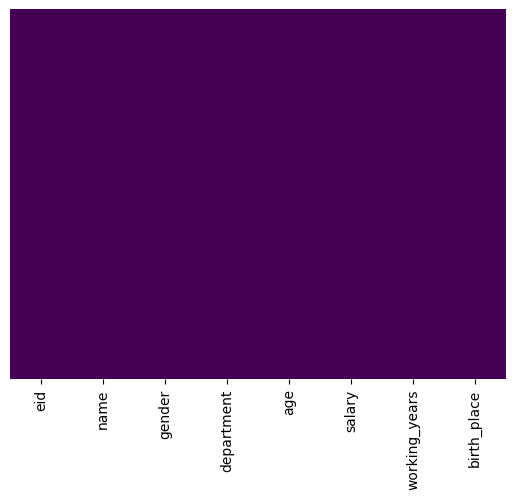

In [13]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [14]:
# count missing values in each variable
df.isnull().sum()

eid              0
name             0
gender           0
department       0
age              0
salary           0
working_years    0
birth_place      0
dtype: int64

In [15]:
# find missing value percent
null_percent = df.isnull().sum()/len(df)*100
null_percent

eid              0.0
name             0.0
gender           0.0
department       0.0
age              0.0
salary           0.0
working_years    0.0
birth_place      0.0
dtype: float64

# Descriptive Statistics : Centrality and Dispersion

In [16]:
df.mean(numeric_only=True)

age                 32.75
salary           59775.00
working_years        4.25
dtype: float64

In [17]:
num_columns = ['age', 'salary','working_years']
num_df = df[num_columns]

In [18]:
num_df.describe()

,age,salary,working_years
count,8.000000,8.000000,8.000000
mean,32.750000,59775.000000,4.250000
std,5.625198,13705.030359,2.251983
min,25.000000,42400.000000,2.000000
25%,28.250000,47900.000000,2.750000
50%,33.500000,60400.000000,3.500000
75%,37.500000,68925.000000,5.500000
max,39.000000,80500.000000,8.000000


In [19]:
num_df.mean()

age                 32.75
salary           59775.00
working_years        4.25
dtype: float64

In [20]:
num_df.mode().loc[0,]

age                 39.0
salary           42400.0
working_years        2.0
Name: 0, dtype: float64

In [21]:
num_df.groupby('working_years').mean()

,age,salary
working_years,,
2,25.5,45550.0
3,32.0,51050.0
4,39.0,64200.0
5,32.0,67700.0
7,37.0,80500.0
8,39.0,72600.0


In [22]:
# standard deviation
num_df.std()

age                  5.625198
salary           13705.030359
working_years        2.251983
dtype: float64

In [23]:
# IQR
num_df.quantile(0.75) - num_df.quantile(0.25)

age                  9.25
salary           21025.00
working_years        2.75
dtype: float64

In [24]:
# Coefficient of variation
num_df.std() / num_df.mean()

age              0.171762
salary           0.229277
working_years    0.529878
dtype: float64

In [25]:
num_df.skew()

age             -0.267259
salary           0.151770
working_years    0.788038
dtype: float64

# Data Distributions
- Histograms
- Boxplots
- Overlay histograms

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'salary'}>],
       [<Axes: title={'center': 'working_years'}>, <Axes: >]],
      dtype=object)

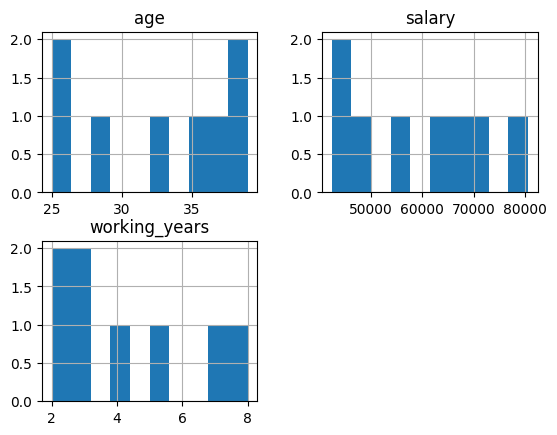

In [26]:
df.hist()

Text(0, 0.5, 'Frequency')

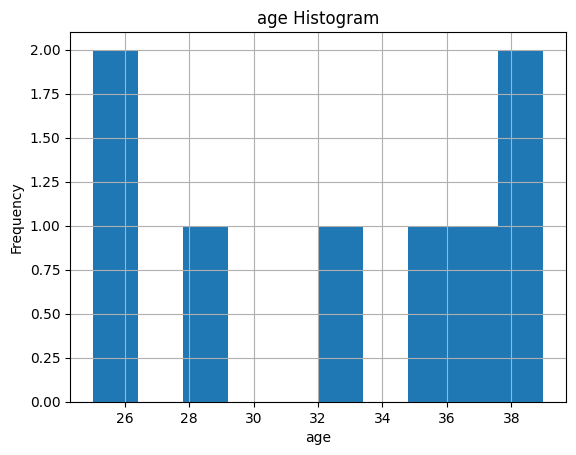

In [27]:
selected_var = 'age'
#df.hist(column=selected_var)
df[selected_var].hist()
plt.title(selected_var + ' Histogram')
plt.xlabel(selected_var)
plt.ylabel('Frequency')

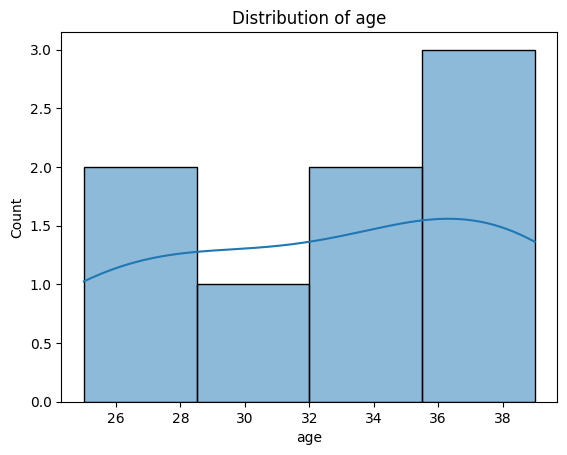

In [28]:
# Plot the distribution of a variable
sns.histplot(df[selected_var], kde=True)
plt.title('Distribution of ' + selected_var)
plt.show()

Text(0, 0.5, 'Probability')

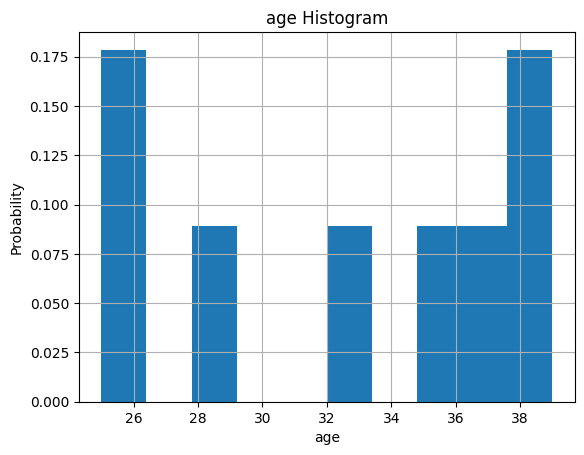

In [29]:
df.hist(column=selected_var, density=True)
plt.title(selected_var + ' Histogram')
plt.xlabel(selected_var)
plt.ylabel('Probability')

In [30]:
df[selected_var].describe()

count     8.000000
mean     32.750000
std       5.625198
min      25.000000
25%      28.250000
50%      33.500000
75%      37.500000
max      39.000000
Name: age, dtype: float64

Text(0, 0.5, 'Frequency')

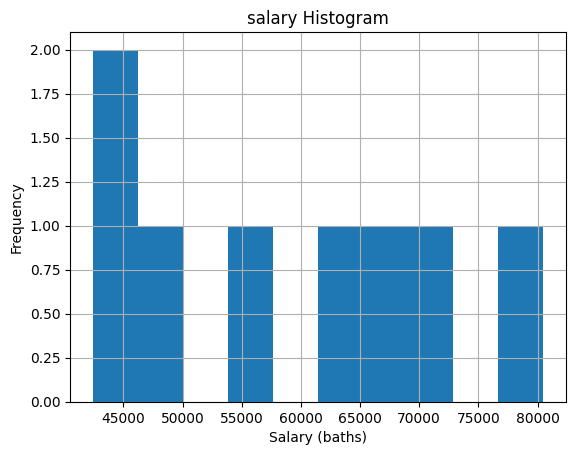

In [31]:
selected_var2 = 'salary'
df.hist(column=selected_var2)
#df[selected_var2].hist()
#df.Fare.hist(
plt.title(selected_var2 + ' Histogram')
plt.xlabel('Salary (baths)')
plt.ylabel('Frequency')

In [32]:
df['salary'].describe()

count        8.000000
mean     59775.000000
std      13705.030359
min      42400.000000
25%      47900.000000
50%      60400.000000
75%      68925.000000
max      80500.000000
Name: salary, dtype: float64

# Boxplots

<Axes: >

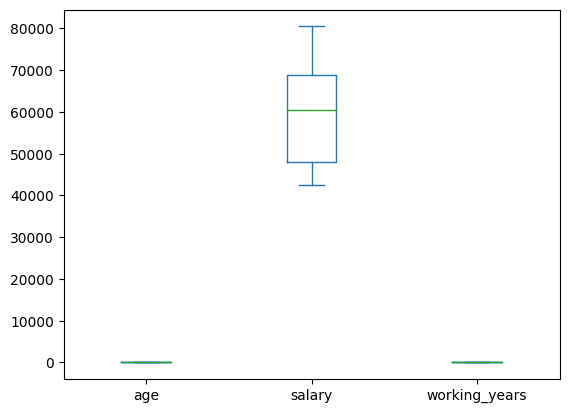

In [33]:
df[["age", "salary", "working_years"]].plot.box()

<Axes: xlabel='age'>

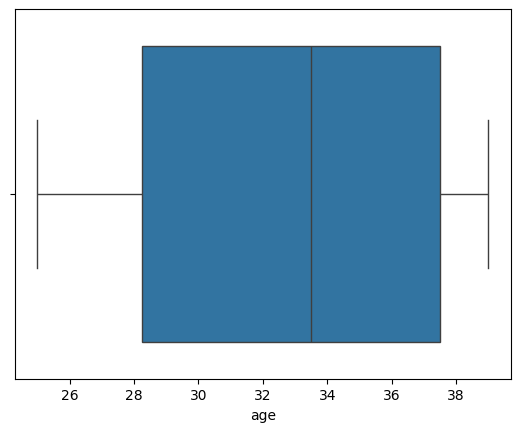

In [34]:
sns.boxplot(x='age', data=df)

<Axes: xlabel='department', ylabel='age'>

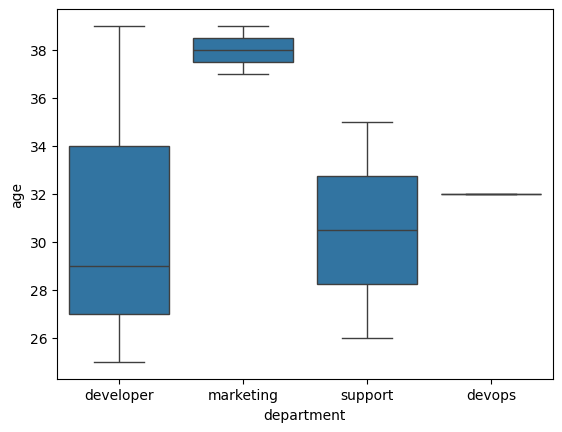

In [35]:
x_var = 'department'
sns.boxplot(x=x_var,y='age', data=df)

Text(0, 0.5, 'Frequency')

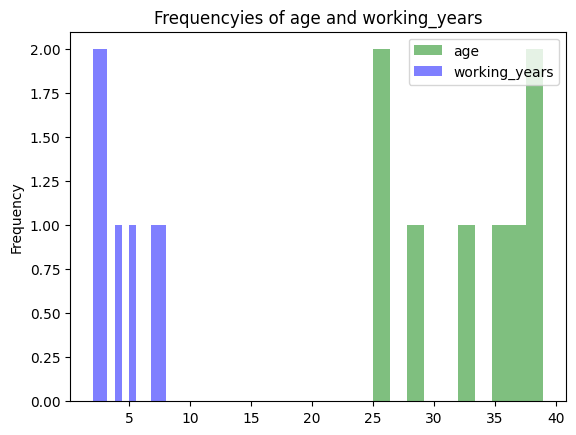

In [36]:
# Overlay histograms
pair_var1 = 'age'
pair_var2 = 'working_years'
plt.hist(df.age, label=pair_var1, color='green', alpha=0.5)
plt.hist(df.working_years, label=pair_var2, color='blue', alpha=0.5)
plt.legend()
plt.title('Frequencyies of ' + pair_var1 + ' and ' + pair_var2)
plt.ylabel('Frequency')

# Exploring the relationship between variables
- Relationship between (numerical - numerical) variables
- Relationship between (categorical - categorical) variables
- Relationship between (numerical - categorical) variables

## Exploring the relationship between (numerical - numerical) variables
- Correlation
- Scatter Plot

### Pearson Correlation

In [37]:
df[["age","salary"]].corr(method="pearson").loc["age","salary"]

0.8143171504098725

In [38]:
df[["age","salary"]].corr(method="pearson")

,age,salary
age,1.000000,0.814317
salary,0.814317,1.000000


### Scatter Plot

<Axes: xlabel='age', ylabel='salary'>

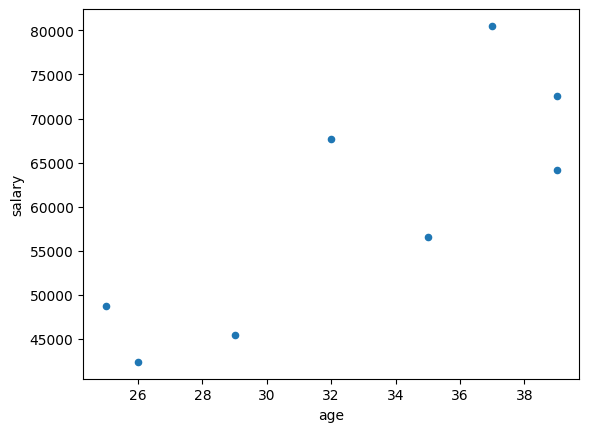

In [39]:
df.plot.scatter(x="age", y="salary")

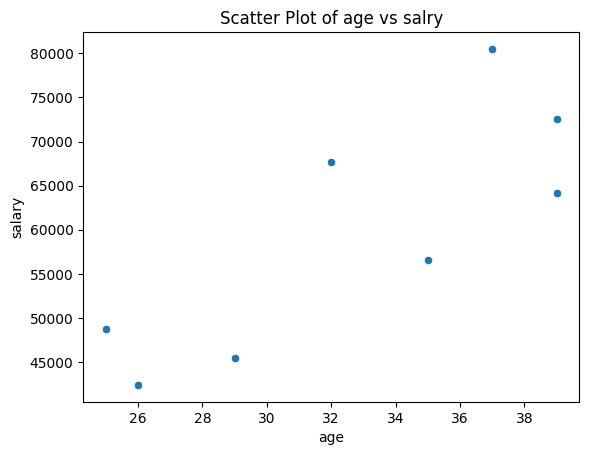

In [40]:
# Scatter plot to check the relationship between two variables
sns.scatterplot(data=df, x='age', y='salary')
plt.title('Scatter Plot of age vs salry')
plt.show()

### Pairplot

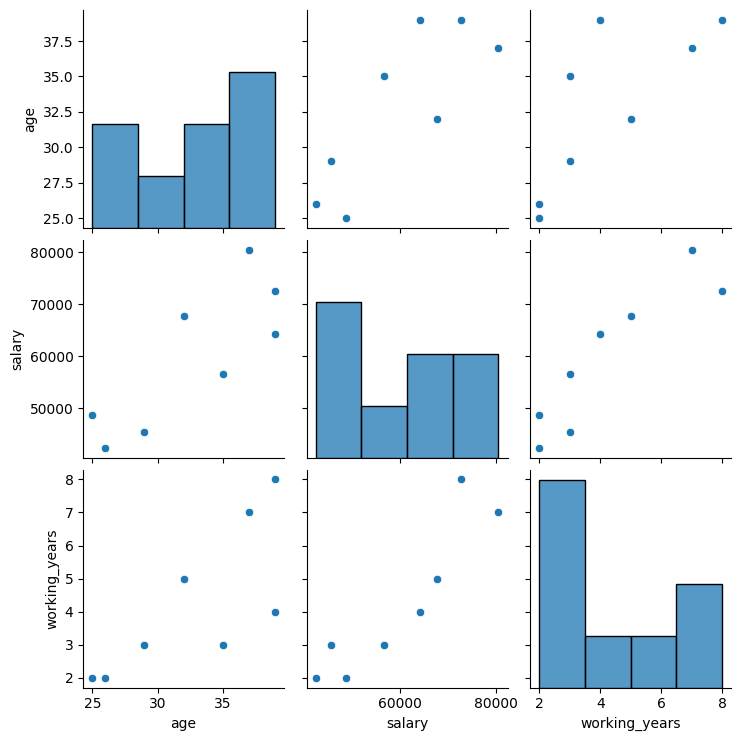

In [41]:
sns.pairplot(num_df)

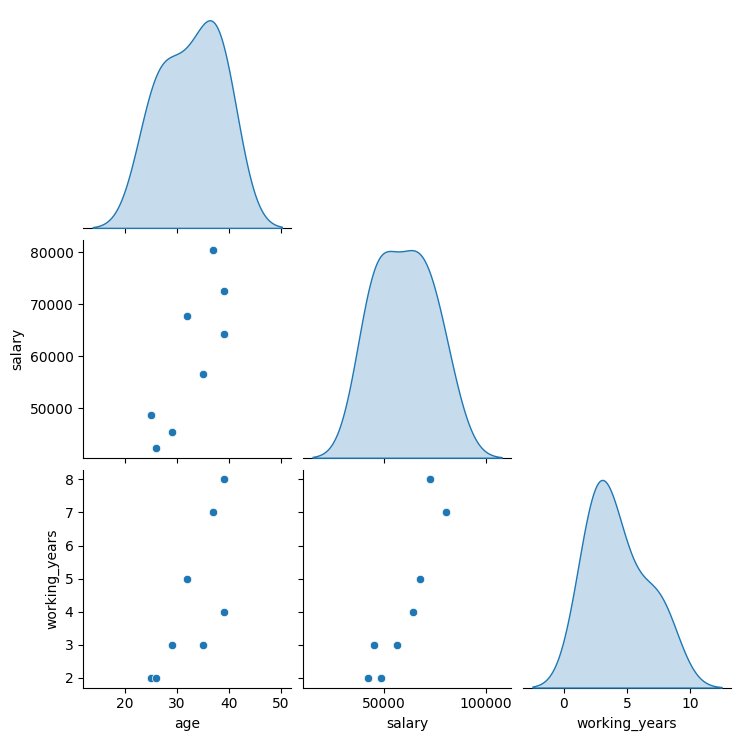

In [42]:
sns.pairplot(df[["age","salary","working_years"]], diag_kind="kde", corner=True)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)


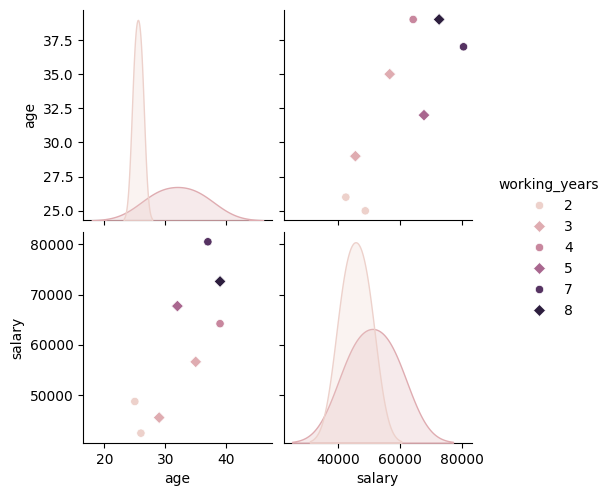

In [43]:
hue_var = 'working_years'
sns.pairplot(num_df,hue=hue_var, markers=["o", "D"])

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (2) th

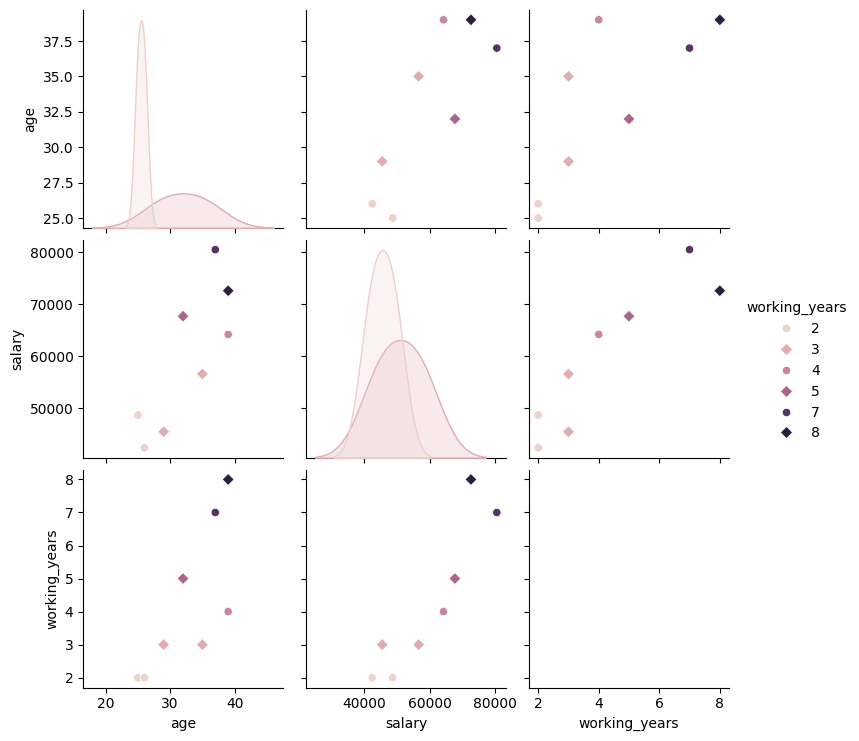

In [44]:
sns.pairplot(num_df, vars = ['age', 'salary', 'working_years'], hue=hue_var, markers=["o", "D"])

### Heatmap

<Axes: >

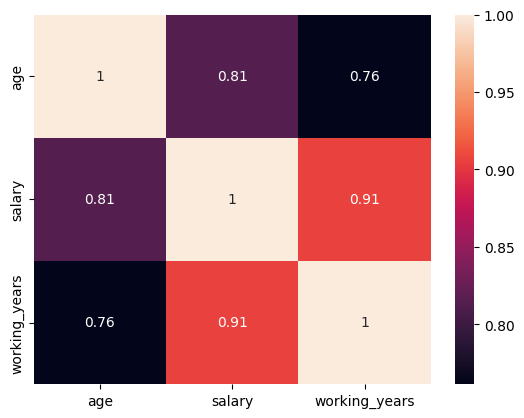

In [45]:
sns.heatmap(df[["age","salary","working_years"]].corr(), annot=True)

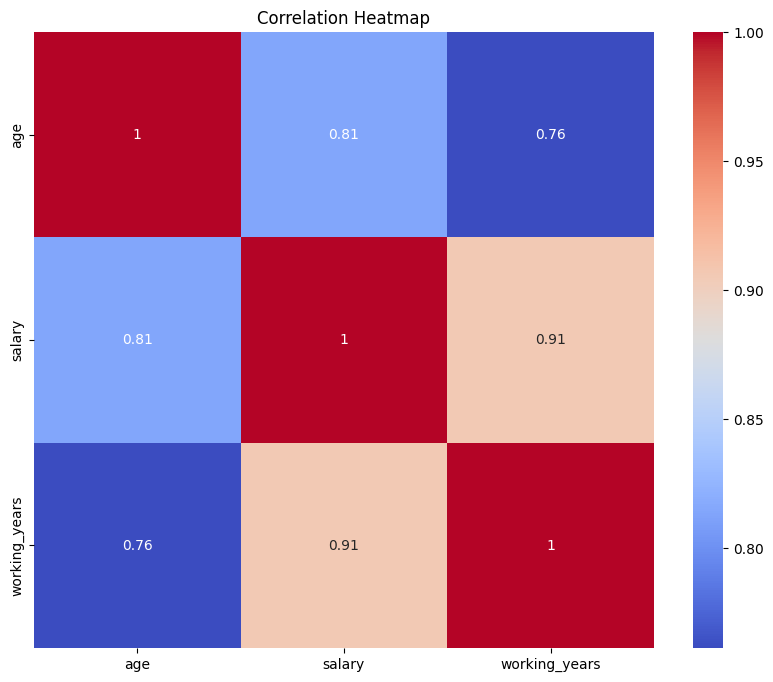

In [46]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[["age","salary","working_years"]].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Exploring the relationship between (categorical - categorical) variables
การสํารวจความสัมพันธ์ระหว่างตัวแปรเชิงกลุ่มกับตัวแปรเชิงกลุ่ม (Categorical-Categorical) เป็นการวิเคราะห์เพื่อดูว่ามีความสัมพันธ์หรือการเชื่อมโยงระหว่าง
ตัวแปรสองตัวหรือไม่โดยวิธีที่ใช้ได้แก่:
- ตารางสรุปความถี่ (Contingency Table)
- Chi-Square Test of Independence
- Cramér's V
- Phi Coefficient
- ความถี่สัมพัทธ์ (Relative Frequencies)
การใช้วิธีเหล่านี้จะช่วยให้สามารถวิเคราะห์และสรุปผลความสัมพันธ์ระหว่างตัวแปรเชิงกลุ่มได้อย่างมีประสิทธิภาพ

### ตารางสรุปความถี่ (Contingency Table, Cross-tabulation)

In [47]:
# Create a contingency table
contingency_table = pd.crosstab(df['department'], df['gender'])
contingency_table

gender,female,male
department,,
developer,2,1
devops,0,1
marketing,1,1
support,1,1


<Axes: xlabel='department', ylabel='count'>

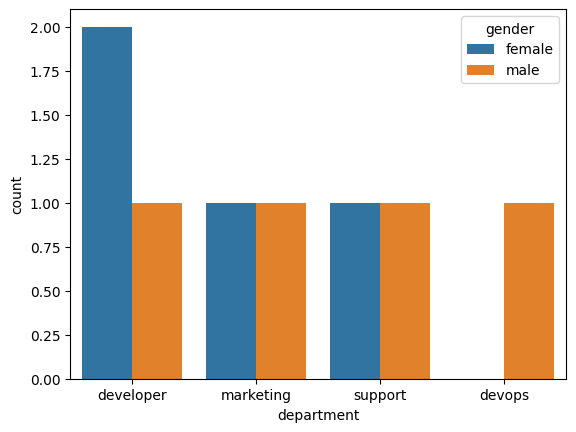

In [48]:
sns.countplot(data=df, x="department", hue="gender")

แต่ละแผนกมีเพศหญิงและชายประมาณพอ ๆ กัน แต่ในแผนก developer มีเพศหญิงมากกว่า ในขณะที่แผนก devops มีแต่เพศชาย

### Chi-Square Test of Independence

In [49]:
from scipy.stats import chi2_contingency
# Perform Chi-Square Test of Independence
chi2, p, dof, expected = chi2_contingency(contingency_table)
# Display the results
chi2, p, dof, expected

(1.3333333333333333,
 0.7212333746277604,
 3,
 array([[1.5, 1.5],
        [0.5, 0.5],
        [1. , 1. ],
        [1. , 1. ]]))

In [50]:
print(f"Chi2: {chi2}, p-value: {p}, Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi2: 1.3333333333333333, p-value: 0.7212333746277604, Degrees of Freedom: 3
Expected Frequencies:
[[1.5 1.5]
 [0.5 0.5]
 [1.  1. ]
 [1.  1. ]]


### ความถี่สัมพัทธ์ (Relative Frequencies)

In [51]:
# Calculate relative frequencies
relative_frequencies = contingency_table.apply(lambda r: r/r.sum(), axis=1)
relative_frequencies

gender,female,male
department,,
developer,0.666667,0.333333
devops,0.000000,1.000000
marketing,0.500000,0.500000
support,0.500000,0.500000


แต่ละแผนกมีเพศหญิงและชายประมาณพอ ๆ กัน แต่ในแผนก developer มีเพศหญิงมากกว่า ในขณะที่แผนก devops มีแต่เพศชาย

## Exploring the relationship between (numerical - categorical) variables

### การหาค่าเฉลี่ยรายกลุ่ม

<Axes: xlabel='department'>

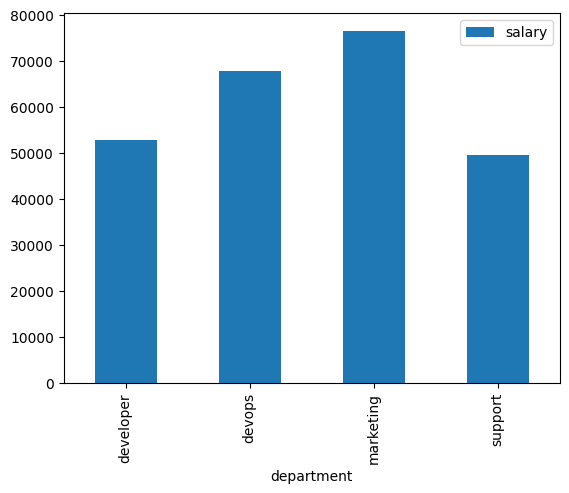

In [52]:
dfg = df.groupby("department")[["salary"]].mean().reset_index()
dfg.plot.bar(x="department", y="salary")